## 1.2 线性判别和二次判别分析LDA和QDA

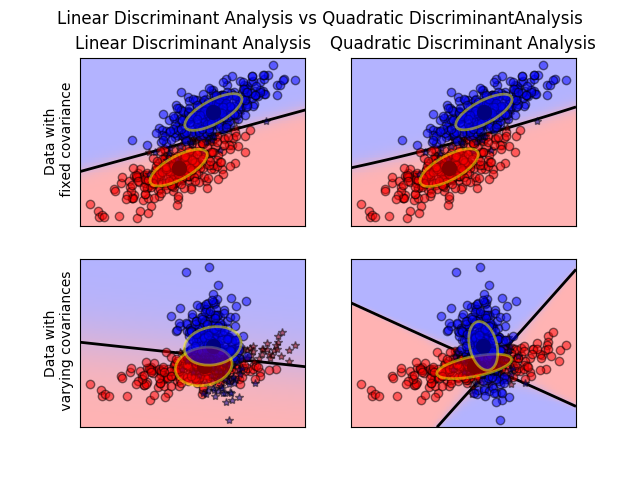

以上这些图像展示了 Linear Discriminant Analysis （线性判别分析）以及 Quadratic Discriminant Analysis （二次判别分析）的决策边界。其中，最后一行表明了线性判别分析只能学习线性边界， 而二次判别分析则可以学习二次边界，因此它相对而言更加灵活

**LDA的思想**

投影后类内方差最小，类间方差最大

###  1.2.1使用线性判别分析来降维
将输入数据投影到差异最大化类方向所组成的线性子空间可以执行有监督降维

输出的维度比原来类别数更少，但仅适用于多分类

实现方式在 discriminant_analysis.LinearDiscriminantAnalysis.transform 中。关于维度的数量可以通过 n_components 参数来调节。 值得注意的是，这个参数不会对 discriminant_analysis.LinearDiscriminantAnalysis.fit 或者 discriminant_analysis.LinearDiscriminantAnalysis.predict 产生影响。
　　　　LDA算法既可以用来降维，又可以用来分类，但是目前来说，主要还是用于降维。在我们进行图像识别图像识别相关的数据分析时，LDA是一个有力的工具。下面总结下LDA算法的优缺点。

　　　　LDA算法的主要优点有：

　　　　1）在降维过程中可以使用类别的先验知识经验，而像PCA这样的无监督学习则无法使用类别先验知识。

　　　　2）LDA在样本分类信息依赖均值而不是方差的时候，比PCA之类的算法较优。

　　　　LDA算法的主要缺点有：

　　　　1）LDA不适合对非高斯分布样本进行降维，PCA也有这个问题。

　　　　2）LDA降维最多降到类别数k-1的维数，如果我们降维的维度大于k-1，则不能使用LDA。当然目前有一些LDA的进化版算法可以绕过这个问题。

　　　　3）LDA在样本分类信息依赖方差而不是均值的时候，降维效果不好。

　　　　4）LDA可能过度拟合数据。

 


### 1.2.2 LDA和QDA分类器的数学公式
LDA 和 QDA 都是源于简单的概率模型，这些模型对于每一个类别 k 的相关分布 P(X|y=k) 都可以通过贝叶斯定理所获得。

$$P(y=k | X) = \frac{P(X | y=k) P(y=k)}{P(X)} = \frac{P(X | y=k) P(y = k)}{ \sum_{l} P(X | y=l) \cdot P(y=l)}$$

我们选择最大化条件概率的类别 k.

更具体地说，对于线性以及二次判别分析， P(X|y) 被建模成密度多变量高斯分布:

$$p(X | y=k) = \frac{1}{(2\pi)^n |\Sigma_k|^{1/2}}\exp\left(-\frac{1}{2} (X-\mu_k)^t \Sigma_k^{-1} (X-\mu_k)\right)$$

为了把该模型作为分类器使用，我们只需要从训练数据中估计出类的先验概率 P(y=k) （通过每个类 k 的实例的比例得到） 类别均值 \mu_k （通过经验样本的类别均值得到）以及协方差矩阵（通过经验样本的类别协方差或者正则化的估计器 estimator 得到: 见下面的 shrinkage 章节）。

在 LDA 中，每个类别 k 的高斯分布共享相同的协方差矩阵：$\Sigma_k = \Sigma$ for all $k$。这导致了两者之间的线性决策表面，这可以通过比较对数概率比看出来
$\log[P(y=k | X) / P(y=l | X)] $
$$\log\left(\frac{P(y=k|X)}{P(y=l | X)}\right) = 0 \Leftrightarrow (\mu_k-\mu_l)\Sigma^{-1} X = \frac{1}{2} (\mu_k^t \Sigma^{-1} \mu_k - \mu_l^t \Sigma^{-1} \mu_l)$$

### 1.2.4. Shrinkage（特征缩减）

## 1.3 内核岭回归KRR
使用内核方法的岭回归。类比SVR支持向量回归，形式是一样的，但损失函数不同。另外KRR的学习模型是非稀疏的因此比SVR慢。

## 1.4 支持向量机
可用于分类、回归、异常检测

支持向量机的优势在于:

在高维空间中非常高效.
+ 即使在数据维度比样本数量大的情况下仍然有效.
+ 支持向量是训练集的子集,因此它对内存友好（与之相反的是KNN）.
+ 通用性: 不同的核函数与特定的决策函数一一对应.常见的 kernel 已经提供,也可以指定定制的内核.

### 1.4.1. 分类

可以使用SVC，NuSVC，LinearSVC实现多元分类

SVC和NuSVC是相似的方法，有稍许不同的参数设置和不同的数学方程

LinearSVC是使用线性核的支持向量类，不接受关键词kernel

In [2]:
from sklearn import svm
X = [[0, 0], [1, 1]]
y = [0, 1]
clf= svm.SVC()
clf.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [3]:
clf.predict([[2.,2.]])

array([1])

In [4]:
 clf.support_vectors_

array([[ 0.,  0.],
       [ 1.,  1.]])

#### 1.4.1.1 多元分类
SVC和NuSVC实现了one vs one的多分类方案

而LinearSVC实现的为one vs rest

In [6]:
X = [[0], [1], [2], [3]]
Y = [0, 1, 2, 3]
clf = svm.SVC(decision_function_shape='ovo')
clf.fit(X,Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [8]:
dec = clf.decision_function([[1]])
dec.shape[1]# 4 classes: 4*3/2 = 6

6

#### 1.4.1.2 得分和概率
#### 1.4.1.3 非均衡问题
给某一类使用class_weight和sample_weight提高权重  

SVC (而不是 NuSVC) 在 fit 方法中生成了一个关键词 class_weight. 它是形如 {class_label : value} 的字典, value 是浮点数大于 0 的值, 把类 class_label 的参数 C 设置为 C * value

SVC, NuSVC, SVR, NuSVR 和 OneClassSVM 在 fit 方法中通过关键词 sample_weight 为单一样例实现权重weights.与 class_weight 相似, 这些把第i个样例的参数 C 换成 C * sample_weight[i]

### 1.4.2 回归

SVR，NuSVR，LinearSVR，类似前面


In [11]:
from sklearn import svm
X = [[0, 0], [2, 2]]
y = [0.5, 2.5]
clf = svm.SVR()
clf.fit(X, y) 

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [12]:
clf.predict([[1, 1]])

array([ 1.5])

### 1.4.3 密度估计，异常检测
使用类OneClassSVM，给定一个样例集，根据样例集计算决策边界，判断新数据点是否在决策边界内。

这种情况下属于非监督学习

### 1.4.4 复杂度
核心是一个QP问题（二次规划问题），将支持向量与其他训练数据部分分开

基于libsvm实现的QP求解器的复杂度介于$O(n_{features} \times n_{samples}^2) $ 和 $ O(n_{features} \times n_{samples}^3) $ 之间，取决于实际数据集使用 libsvm cache的效率

### 1.4.5 使用诀窍
+ 避免数据复制: 对于 SVC， SVR， NuSVC 和 NuSVR， 如果数据是通过某些方法而不是用 C 有序的连续双精度，那它先会调用底层的 C 命令再复制。 您可以通过检查它的 flags 属性，来确定给定的 numpy 数组是不是 C 连续的。

 对于 LinearSVC (和 LogisticRegression) 的任何输入，都会以 numpy 数组形式，被复制和转换为 用 liblinear 内部稀疏数据去表达（双精度浮点型 float 和非零部分的 int32 索引）。 如果您想要一个适合大规模的线性分类器，又不打算复制一个密集的 C-contiguous 双精度 numpy 数组作为输入， 那我们建议您去使用 SGDClassifier 类作为替代。目标函数可以配置为和 LinearSVC 模型差不多相同的。


+ 内核的缓存大小: 在大规模问题上，对于 SVC, SVR, nuSVC 和 NuSVR, 内核缓存的大小会特别影响到运行时间。如果您有足够可用的 RAM，不妨把它的 缓存大小 设得比默认的 200(MB) 要高，例如为 500(MB) 或者 1000(MB)。


+ 惩罚系数C的设置:在合理的情况下， C 的默认选择为 1 。如果您有很多混杂的观察数据， 您应该要去调小它。 C 越小，就能更好地去正规化估计。


+ 支持向量机算法的缩放尺度不是固定的，所**我们强烈建议您去缩放数据**. 举个例子，对于输入向量 X， 规整它的每个数值范围为 [0, 1] 或 [-1, +1] ，或者标准化它的为均值为0方差为1的数据分布。请注意， 相同的缩放标准必须要应用到测试向量，从而获得有意义的结果。 请参考章节 预处理数据 ，那里会提供到更多关于缩放和标准化。


+ 在 NuSVC/OneClassSVM/NuSVR 内的参数 nu ， 近似是训练误差和支持向量的比值。


+ 在 SVC, ，如果分类器的数据不均衡（就是说，很多正例很少负例），设置 class_weight='balanced' 与/或尝试不同的惩罚系数 C 。


+ 在拟合模型时，底层 LinearSVC 操作使用了随机数生成器去选择特征。 所以不要感到意外，对于相同的数据输入，也会略有不同的输出结果。如果这个发生了， 尝试用更小的 tol 参数。


+ 使用由 LinearSVC(loss='l2', penalty='l1', dual=False) 提供的 L1 惩罚去产生稀疏解，也就是说，特征权重的子集不同于零，这样做有助于决策函数。 随着增加 C 会产生一个更复杂的模型（要做更多的特征选择）。可以使用 l1_min_c 去计算 C 的数值，去产生一个”null” 模型（所有的权重等于零）。

### 1.4.6 核函数
支持
+ 线性 kernel='linear'
+ 多项式 'poly'
+ 径向基 kernel='rbf'
+ sigmoid 'sigmoid'
+ Gram矩阵 'precomputed'

可以使用python函数或Gram矩阵作为核

In [17]:
#python自定义函数
import numpy as np
from sklearn import svm
def my_kernel(X, Y):
    return np.dot(X, Y.T)

clf = svm.SVC(kernel=my_kernel)

In [18]:
#Gram
import numpy as np
from sklearn import svm
X = np.array([[0, 0], [1, 1]])
y = [0, 1]
clf = svm.SVC(kernel='precomputed')
# 线性内核计算
gram = np.dot(X, X.T)
clf.fit(gram, y) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto',
  kernel='precomputed', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [19]:
# 预测训练样本
clf.predict(gram)

array([0, 1])

#### 1.4.6.1 径向基核
需要考虑参数C惩罚系数和Gamma

C，与大多数SVM核相同，权衡更简单的决策曲线和训练样本的错误分类。较小的C，决策边界更光滑，但会造成更多训练样本的错误分类。较大的C，保证了训练样本分类正确率更高，但决策边界会更复杂

Gamma定义了单一训练样本的影响。Gamma越大，越近的其他样本点必须受到影响

C和Gramma的值对SVM的性能起决定性作用，建议使用sklearn.model_selection.GridSearchCV，以及指数间隔的C和Gamma，以选择更好的值